In [1]:
%matplotlib inline

In [2]:
import os
from galsize_models.measurements import load_sdss_size_vs_stellar_mass
repodirname = "/Users/aphearin/work/repositories/python/galsize_models"
subdirname = "galsize_models/measurements/data/one_point_functions"
dirname = os.path.join(repodirname, subdirname)


from galsize_models.measurements import tabulate_sdss_size_vs_stellar_mass
tabulate_sdss_size_vs_stellar_mass(dirname)
_sdss = load_sdss_size_vs_stellar_mass(dirname, statistic='median')
logsm_bins, mean_size_all_sdss, \
mean_size_q_sdss, mean_size_sf_sdss, mean_size_gv_sdss,\
scatter_size_all_sdss, scatter_size_q_sdss, scatter_size_sf_sdss, scatter_size_gv_sdss = _sdss
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])


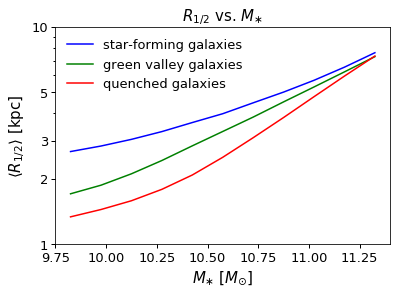

In [3]:
from matplotlib import ticker
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)
# ax.loglog()
yscale = ax.set_yscale('log')

sm_mids = 10**logsm_mids

mean_size_sf_smooth = savgol_filter(mean_size_sf_sdss, 7, 3)
mean_size_gv_smooth = savgol_filter(mean_size_gv_sdss, 7, 3)
mean_size_q_smooth = savgol_filter(mean_size_q_sdss, 7, 3)

__=ax.plot(logsm_mids, mean_size_sf_smooth, color='blue', label='star-forming galaxies')
__=ax.plot(logsm_mids, mean_size_gv_smooth, color='green', label='green valley galaxies')
__=ax.plot(logsm_mids, mean_size_q_smooth, color='red', label='quenched galaxies')

legend = ax.legend()

ylim = ax.set_ylim(1, 10)
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.set_yticks((1, 2, 3, 5, 10))

title = ax.set_title(r'$R_{1/2}$ vs. $M_{\ast}$')
xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$\langle R_{1/2}\rangle$ [kpc]')

fig.savefig('size_vs_stellar_mass_sdss.pdf', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight')


## Now reproduce Kravtsov (2013)

In [4]:
from galsize_models.measurements import load_umachine_sdss_with_meert15

full_sdss, is_complete = load_umachine_sdss_with_meert15()
meert15_measurement_mask = ~np.isnan(full_sdss['r50_magr_kpc_meert15'])

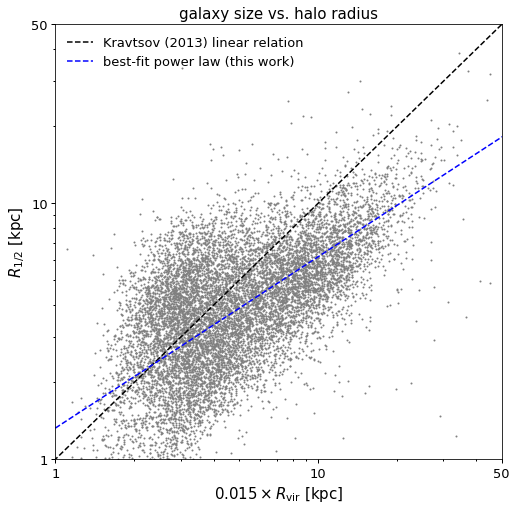

In [5]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
import matplotlib.ticker

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

mask = meert15_measurement_mask
sm = 10**full_sdss['sm'][mask]
rhalo_planck15_kpc = halo_radius_vs_stellar_mass(sm)*1000.
rhalf_planck15_kpc = full_sdss['r50_magr_kpc_meert15'][mask]

nskip = 50
__=ax.scatter(0.015*rhalo_planck15_kpc[::nskip], rhalf_planck15_kpc[::nskip], 
              s=1, color='gray', label='')
__=ax.plot(np.logspace(-1, 2, 100), np.logspace(-1, 2, 100), 
           '--', color='k', label='Kravtsov (2013) linear relation')

from scipy.stats import binned_statistic
logrhalo_min, logrhalo_max = np.log10(1.25), np.log10(40)
rhalo_bins = np.logspace(logrhalo_min, logrhalo_max, 20)
median_rhalf, bin_edges, __ = binned_statistic(0.015*rhalo_planck15_kpc, rhalf_planck15_kpc, 
                                    bins=rhalo_bins, statistic='median')
bin_mids = 0.5*(rhalo_bins[:-1] + rhalo_bins[1:])

logx = np.log10(bin_mids)
logy = np.log10(median_rhalf)
c1, c0 = np.polyfit(logx, logy, 1)
x_linear_fit = np.logspace(0, 2, 100)
median_rhalf_linear_fit = 10**(c0 + c1*np.log10(x_linear_fit))
__=ax.plot(x_linear_fit, median_rhalf_linear_fit, 
           '--', color='blue', label='best-fit power law (this work)')

__=ax.loglog()
xlim = ax.set_xlim(1, 50)
ylim = ax.set_ylim(1, 50)
__=ax.set_xticks((1, 10, 50))
__=ax.set_yticks((1, 10, 50))
__=ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
legend = ax.legend()

fig.savefig('kravtsov13_scatter_plot.pdf', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight')


In [6]:
q_mask = full_sdss['ssfr'] < -11.25
mask = meert15_measurement_mask & q_mask

sm = 10**full_sdss['sm'][mask]
rhalo_planck15_kpc = halo_radius_vs_stellar_mass(sm)*1000.
rhalf_planck15_kpc = full_sdss['r50_magr_kpc_meert15'][mask]

nskip = 50
__=ax.scatter(0.015*rhalo_planck15_kpc[::nskip], rhalf_planck15_kpc[::nskip], 
              s=1, color='gray', label='')
__=ax.plot(np.logspace(-1, 2, 100), np.logspace(-1, 2, 100), 
           '--', color='k', label='Kravtsov (2013) linear relation')

from scipy.stats import binned_statistic
logrhalo_min, logrhalo_max = np.log10(1.25), np.log10(40)
rhalo_bins = np.logspace(logrhalo_min, logrhalo_max, 20)
median_rhalf, bin_edges, __ = binned_statistic(0.015*rhalo_planck15_kpc, rhalf_planck15_kpc, 
                                    bins=rhalo_bins, statistic='median')
bin_mids = 0.5*(rhalo_bins[:-1] + rhalo_bins[1:])

logx = np.log10(bin_mids)
logy = np.log10(median_rhalf)
c1, c0 = np.polyfit(logx, logy, 1)
x_linear_fit = np.logspace(0, 2, 100)
median_rhalf_linear_fit = 10**(c0 + c1*np.log10(x_linear_fit))

print("Quenched galaxies power law slope = {0:.2f}".format(c1))
print("Quenched galaxies intercept = {0:.2f}".format(c0))

Quenched galaxies power law slope = 0.82


In [7]:
gv_mask = (full_sdss['ssfr'] < -10.75) & (full_sdss['ssfr'] >= -11.25)
mask = meert15_measurement_mask & gv_mask

sm = 10**full_sdss['sm'][mask]
rhalo_planck15_kpc = halo_radius_vs_stellar_mass(sm)*1000.
rhalf_planck15_kpc = full_sdss['r50_magr_kpc_meert15'][mask]

nskip = 50
__=ax.scatter(0.015*rhalo_planck15_kpc[::nskip], rhalf_planck15_kpc[::nskip], 
              s=1, color='gray', label='')
__=ax.plot(np.logspace(-1, 2, 100), np.logspace(-1, 2, 100), 
           '--', color='k', label='Kravtsov (2013) linear relation')

from scipy.stats import binned_statistic
logrhalo_min, logrhalo_max = np.log10(1.25), np.log10(40)
rhalo_bins = np.logspace(logrhalo_min, logrhalo_max, 20)
median_rhalf, bin_edges, __ = binned_statistic(0.015*rhalo_planck15_kpc, rhalf_planck15_kpc, 
                                    bins=rhalo_bins, statistic='median')
bin_mids = 0.5*(rhalo_bins[:-1] + rhalo_bins[1:])

logx = np.log10(bin_mids)
logy = np.log10(median_rhalf)
c1, c0 = np.polyfit(logx, logy, 1)
x_linear_fit = np.logspace(0, 2, 100)
median_rhalf_linear_fit = 10**(c0 + c1*np.log10(x_linear_fit))

print("Green valley power law slope = {0:.2f}".format(c1))
print("Green valley intercept = {0:.2f}".format(c0))

Green valley power law slope = 0.72


In [11]:

sf_mask = full_sdss['ssfr'] > -10.75
mask = meert15_measurement_mask & sf_mask

sm = 10**full_sdss['sm'][mask]
rhalo_planck15_kpc = halo_radius_vs_stellar_mass(sm)*1000.
rhalf_planck15_kpc = full_sdss['r50_magr_kpc_meert15'][mask]

nskip = 50
__=ax.scatter(0.015*rhalo_planck15_kpc[::nskip], rhalf_planck15_kpc[::nskip], 
              s=1, color='gray', label='')
__=ax.plot(np.logspace(-1, 2, 100), np.logspace(-1, 2, 100), 
           '--', color='k', label='Kravtsov (2013) linear relation')

from scipy.stats import binned_statistic
logrhalo_min, logrhalo_max = np.log10(1.25), np.log10(40)
rhalo_bins = np.logspace(logrhalo_min, logrhalo_max, 20)
median_rhalf, bin_edges, __ = binned_statistic(0.015*rhalo_planck15_kpc, rhalf_planck15_kpc, 
                                    bins=rhalo_bins, statistic='median')
bin_mids = 0.5*(rhalo_bins[:-1] + rhalo_bins[1:])

logx = np.log10(bin_mids)
logy = np.log10(median_rhalf)
c1, c0 = np.polyfit(logx, logy, 1)
x_linear_fit = np.logspace(0, 2, 100)
median_rhalf_linear_fit = 10**(c0 + c1*np.log10(x_linear_fit))

print("Main Sequence power law slope = {0:.2f}".format(c1))
print("Main Sequence intercept = {0:.2f}".format(c0))

Main Sequence power law slope = 0.58
Main Sequence intercept = 0.23
